# Упражнение 01 : Линейный график со стилями

In [7]:
import pandas as pd
import sqlite3
con = sqlite3.connect('../data/checking-logs.sqlite')

* анализируйте только пользователей, а не администраторов
* анализируйте только даты, когда были как просмотры, так и проверки
* используемый размер шрифта должен быть 8
* размер рисунка равен (15,8)

In [8]:
sql = '''
SELECT uid, datetime FROM pageviews
WHERE uid LIKE 'user_%'
'''
df_views = pd.read_sql(sql, con, parse_dates=['datetime'])
df_views = df_views.groupby(df_views['datetime'].dt.date).agg({'uid': 'count'})
df_views = df_views.reset_index()
df_views.columns = ['date', 'views']
df_views

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


In [9]:
sql = '''
SELECT uid, timestamp FROM checker
WHERE uid LIKE 'user_%'
'''
df_commit = pd.read_sql(sql, con, parse_dates=['timestamp'])
df_commit = df_commit.groupby(df_commit['timestamp'].dt.date).agg({'uid': 'count'})
df_commit = df_commit.reset_index()
df_commit.columns = ['date', 'commits']
df_commit

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25
5,2020-04-22,28
6,2020-04-23,43
7,2020-04-24,16
8,2020-04-25,104
9,2020-04-26,261


In [10]:
df = pd.merge(left=df_views, right=df_commit, on='date', how='inner')
df

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


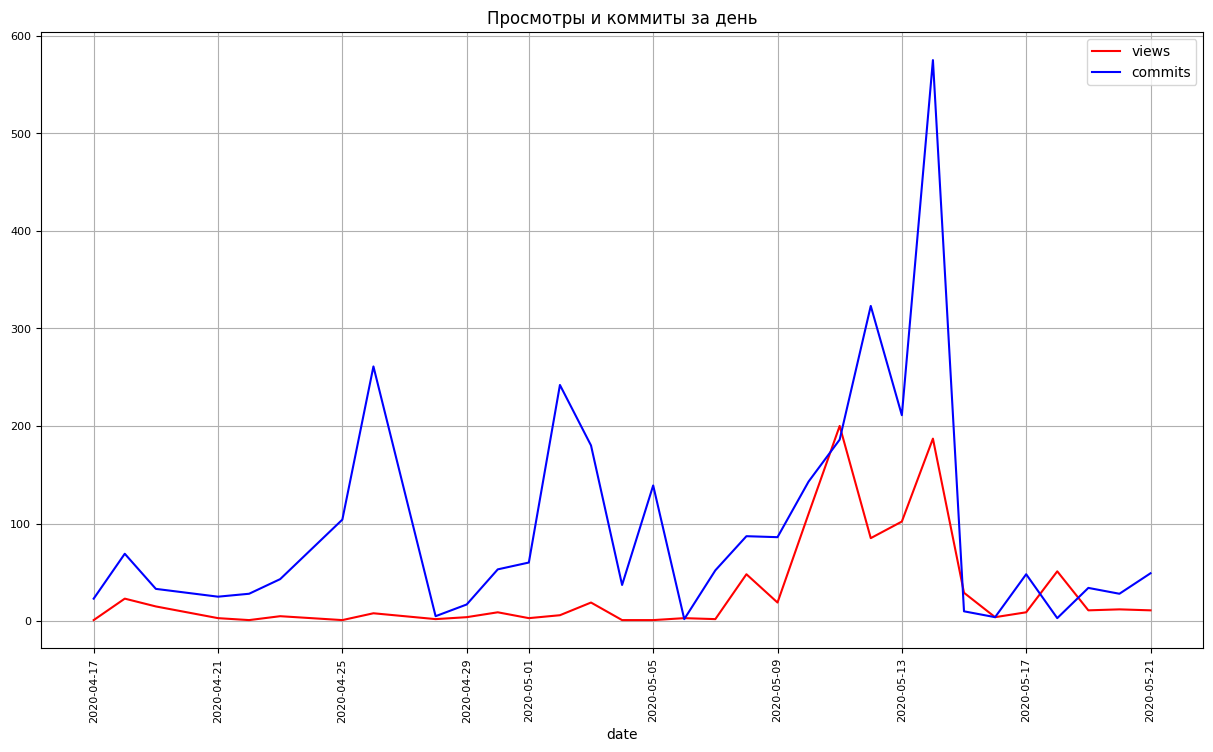

In [11]:
plt = df.plot(x='date',
              y=['views', 'commits'],
              fontsize=8,
              figsize=(15,8),
              title='Просмотры и коммиты за день',
              rot=90,
              color=['red','blue'],
              grid=True)

* В конце блокнота Jupyter создайте ячейку с кодом и вставьте вопрос: «Сколько раз количество просмотров превышало 150?» Вставьте: «Ответ — ___». Вместо подчёркивания введите число.

In [12]:
print('Ответ: ', df[df['views'] > 150]['views'].count())

Ответ:  2


In [13]:
con.close()